# Rothman et al. (2003) Carbon Cycle

Neoprotoerozoic carbon cycle model from Rothman et al. (2003).
> Rothman, D.H., Hayes, J.M., and Summons, R.E., 2003, Dynamics of the Neoproterozoic carbon cycle: Proceedings of the National Academy of Sciences, v. 100, p. 8124–8129, doi:10.1073/pnas.0832439100.


In [5]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
from numba import njit

## Figure 4a

In [172]:
tau1 = 1e3
tau2 = 1e6
di = -6
Ftot = 5e12 # mol C / yr
# J1 = 5e12 # mol C /yr
forg = 0.3

def J1(t):
    """Steady state reservoir 1 flux
    """
    return 1/0.001 * Ftot * (1-forg)

def ji(t):
    """Inorganic carbon input flux
    """
    return Ftot

def j21(t):
    """Remineralization flux
    """
    return 0.999 * J1(t)

def j12(t):
    """Primary production flux
    """
    return 0.999 * J1(t)

def b1(t):
    """Carbonate burial flux
    """
    return (1-forg)*ji(t)

def b2(t):
    """Organic carbon burial flux
    """
    return forg*ji(t)
    
def eps0(t):
    """Organic carbon fractionation factor
    """
    eps0_bar = 28
    a = 5
    nu = 1/(1e5*tau1)
    return eps0_bar + a*np.sin(2*np.pi*nu*t)

#@njit
def rhs(X, t):
    # unpack parameters
    d1, d2, m1, m2 = X
    # _ = theta
    # equations
    dd1_dt = ji(t)/m1*(di-d1) + j21(t)/m1*(d2-d1) + j12(t)/m1*eps0(t)
    dd2_dt = j12(t)/m2*(d1-eps0(t)-d2)
    dm1_dt = ji(t) + j21(t) - j12(t) - b1(t)
    dm2_dt = j12(t) - j21(t) - b2(t)
    return [dd1_dt, dd2_dt, dm1_dt, dm2_dt]

In [177]:
t = np.linspace(0, 0.5e8, 1000)

y0 = [3.6, -24.7, tau1*J1(0), tau2*J1(0)]

out = odeint(func=rhs, y0=y0, t=t)

da_out = out[:, 0]
eps_out = out[:, 0] - out[:, 1]

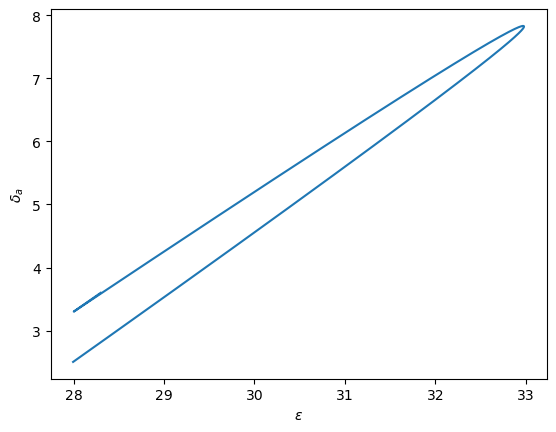

In [178]:
plt.plot(eps_out, da_out)

plt.ylabel('$\\delta_a$')
plt.xlabel('$\\epsilon$')

plt.show()

## Figure 4b

In [157]:
tau1 = 1e3
tau2 = 1e5
di = -6
Ftot = 5e12 # mol C / yr
# J1 = 5e12 # mol C /yr
forg = 0.3

def J1(t):
    """Steady state reservoir 1 flux
    """
    return 1/0.001 * Ftot * (1-forg)

def ji(t):
    """Inorganic carbon input flux
    """
    return Ftot

def j21(t):
    """Remineralization flux
    """
    phi21_0 = 0.999
    a = 0.23
    nu = 1e-5
    phi = phi21_0 + a * (1-np.cos(2*np.pi*nu*t))/2
    return phi * J1(t)

def j12(t):
    """Primary production flux
    """
    return 0.999 * J1(t)

def b1(t):
    """Carbonate burial flux
    """
    return (1-forg)*ji(t)

def b2(t):
    """Organic carbon burial flux
    """
    return forg*ji(t)
    
def eps0(t):
    """Organic carbon fractionation factor
    """
    eps0_bar = 28
    return eps0_bar

#@njit
def rhs(X, t):
    # unpack parameters
    d1, d2, m1, m2 = X
    # _ = theta
    # equations
    dd1_dt = ji(t)/m1*(di-d1) + j21(t)/m1*(d2-d1) + j12(t)/m1*eps0(t)
    dd2_dt = j12(t)/m2*(d1-eps0(t)-d2)
    dm1_dt = ji(t) + j21(t) - j12(t) - b1(t)
    dm2_dt = j12(t) - j21(t) - b2(t)
    return [dd1_dt, dd2_dt, dm1_dt, dm2_dt]

In [162]:
t = np.linspace(0, 1e5, 1000)

y0 = [3, -25, tau1*J1(0), tau2*J1(0)]

In [163]:
out = odeint(func=rhs, y0=y0, t=t)

In [164]:
da_out = out[:, 0]
eps_out = out[:, 0] - out[:, 1]

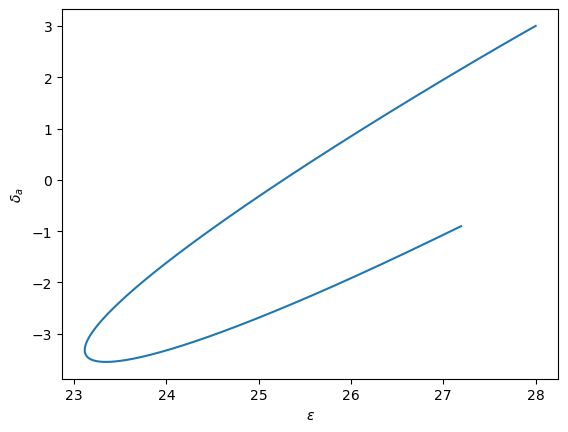

In [170]:
plt.plot(eps_out, da_out)

plt.ylabel('$\\delta_a$')
plt.xlabel('$\\epsilon$')

plt.show()